## Question_1

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

In [6]:
#train = pd.read_csv('../data/train.csv')
train = pd.read_csv('train.csv')

In [7]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
X = train[['1stFlrSF','2ndFlrSF','TotalBsmtSF']].values
X

array([[ 856,  854,  856],
       [1262,    0, 1262],
       [ 920,  866,  920],
       ...,
       [1188, 1152, 1152],
       [1078,    0, 1078],
       [1256,    0, 1256]])

In [9]:
y = train[['SalePrice']].values
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [10]:
beta = ((np.linalg.inv(X.T.dot(X))).dot(X.T)).dot(y)
beta

array([[71.56451306],
       [80.60722621],
       [67.05575936]])

In [11]:
y_hat = X.dot(beta)
y_hat

array([[187497.52437894],
       [174938.78379762],
       [197336.50852855],
       ...,
       [255126.40089751],
       [149432.65367182],
       [174107.06216308]])

In [12]:
r2 = r2_score(y,y_hat)
r2

0.6128732792714722

In [13]:
SS_res = np.sum((y-y_hat)**2)
SS_tot = np.sum((y-np.average(y))**2)
r22 = 1 - SS_res/SS_tot
print(r22)

0.6128732792714722


## Question_2

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [21]:
train = pd.read_csv('train.csv')

In [22]:
features = train[[
    "1stFlrSF",
    "2ndFlrSF",
    "TotalBsmtSF",
    "LotArea",
    "OverallQual",
    "GrLivArea",
    "GarageCars",
    "GarageArea",
]].values
features

array([[ 856,  854,  856, ..., 1710,    2,  548],
       [1262,    0, 1262, ..., 1262,    2,  460],
       [ 920,  866,  920, ..., 1786,    2,  608],
       ...,
       [1188, 1152, 1152, ..., 2340,    1,  252],
       [1078,    0, 1078, ..., 1078,    1,  240],
       [1256,    0, 1256, ..., 1256,    1,  276]])

In [23]:
y = train[['SalePrice']].values

In [24]:
models = []
y_hats = []

for i in range(1,9):
    lnrModel = LinearRegression(fit_intercept=True)
    X = features[:,:i]
    print(X.shape)
    lnrModel = lnrModel.fit(X,y)
    models.append(lnrModel)
    y_hats.append(lnrModel.predict(X))

(1460, 1)
(1460, 2)
(1460, 3)
(1460, 4)
(1460, 5)
(1460, 6)
(1460, 7)
(1460, 8)


In [25]:
r2s = []
MSEs = []
MAEs = []
MAPEs = []
for y_hat in y_hats:
    r2s.append(r2_score(y,y_hat))
    MSEs.append(mean_squared_error(y,y_hat))
    MAEs.append(mean_absolute_error(y,y_hat))
    MAPEs.append(mean_absolute_percentage_error(y,y_hat))

In [26]:
print(r2s)
print(MSEs)
print(MAEs)
print(MAPEs)

[0.36705686969596585, 0.570886201430038, 0.6154510202519747, 0.6161416405192517, 0.7511254567579683, 0.7514484819919405, 0.7671907190668248, 0.7675195817480766]
[3991838509.3767366, 2706330006.6369147, 2425269115.982565, 2420913519.9640913, 1569599128.5028665, 1567561876.6444705, 1468278915.5527272, 1466204848.1484616]
[46242.074794493084, 34669.10012953221, 31550.348606260406, 31472.154569368686, 25405.687388844144, 25376.29560722597, 24641.547200598947, 24500.14269536888]
[0.27893089135316046, 0.20756139318322567, 0.18938830922572902, 0.18885941518670113, 0.15726317966198064, 0.15710679704352823, 0.1517979974347763, 0.15083837232149408]


In [27]:
import matplotlib.pyplot as plt
from matplotlib import ticker
%config InlineBackend.figure_format = "retina"

In [28]:
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["axes.titlesize"] = 18

In [32]:
def plot_metrics_features(metrics,metrics_name):
    fig, ax = plt.subplots()
    ax.scatter(
        x = np.arange(1,9), 
        y = metrics, 
        #alpha=0.25,
        #edgecolors="none"
    )
    #formatter = lambda x, pos: f"${int(x/1000):,}K"
    #ax.yaxis.set_major_formatter(formatter)
    ax.set_ylabel(metrics_name)
    ax.set_xlabel("Number of Features")
    return ax

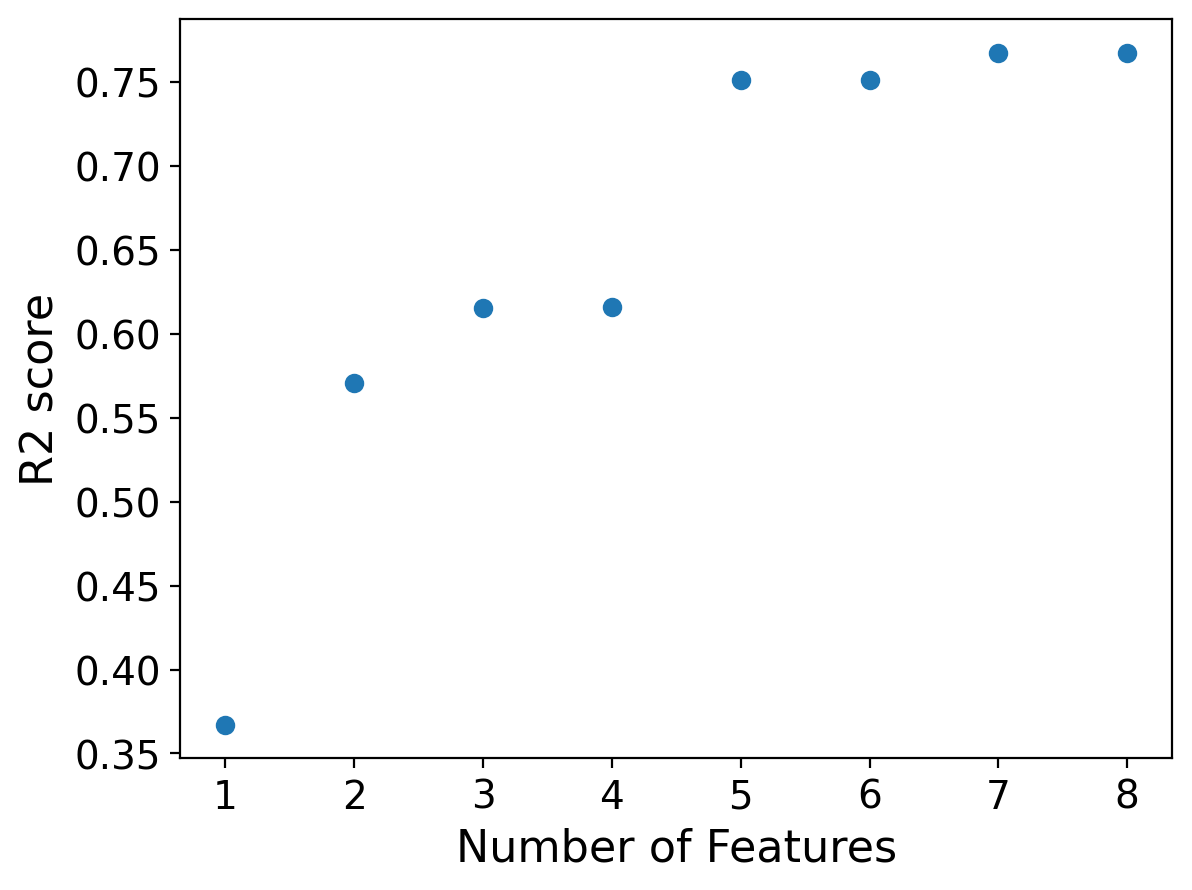

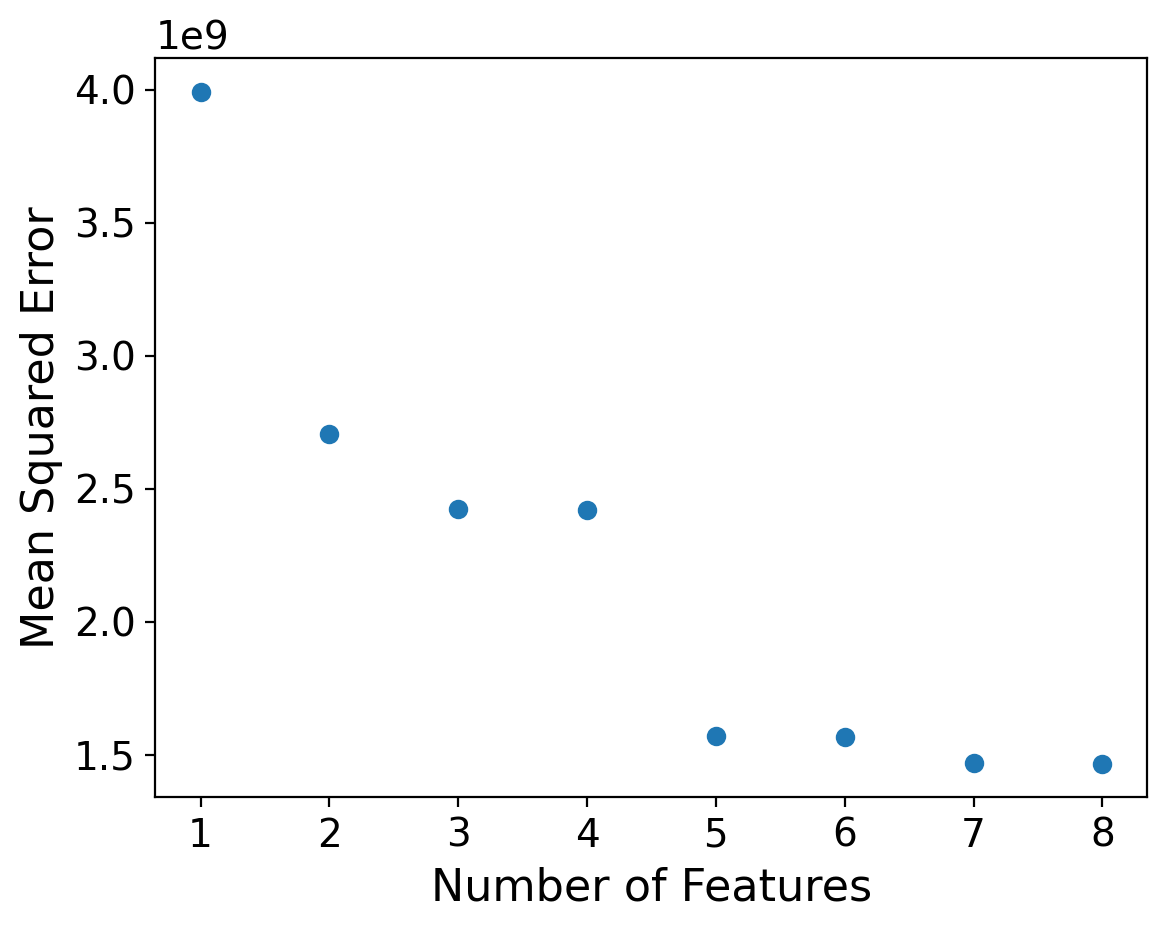

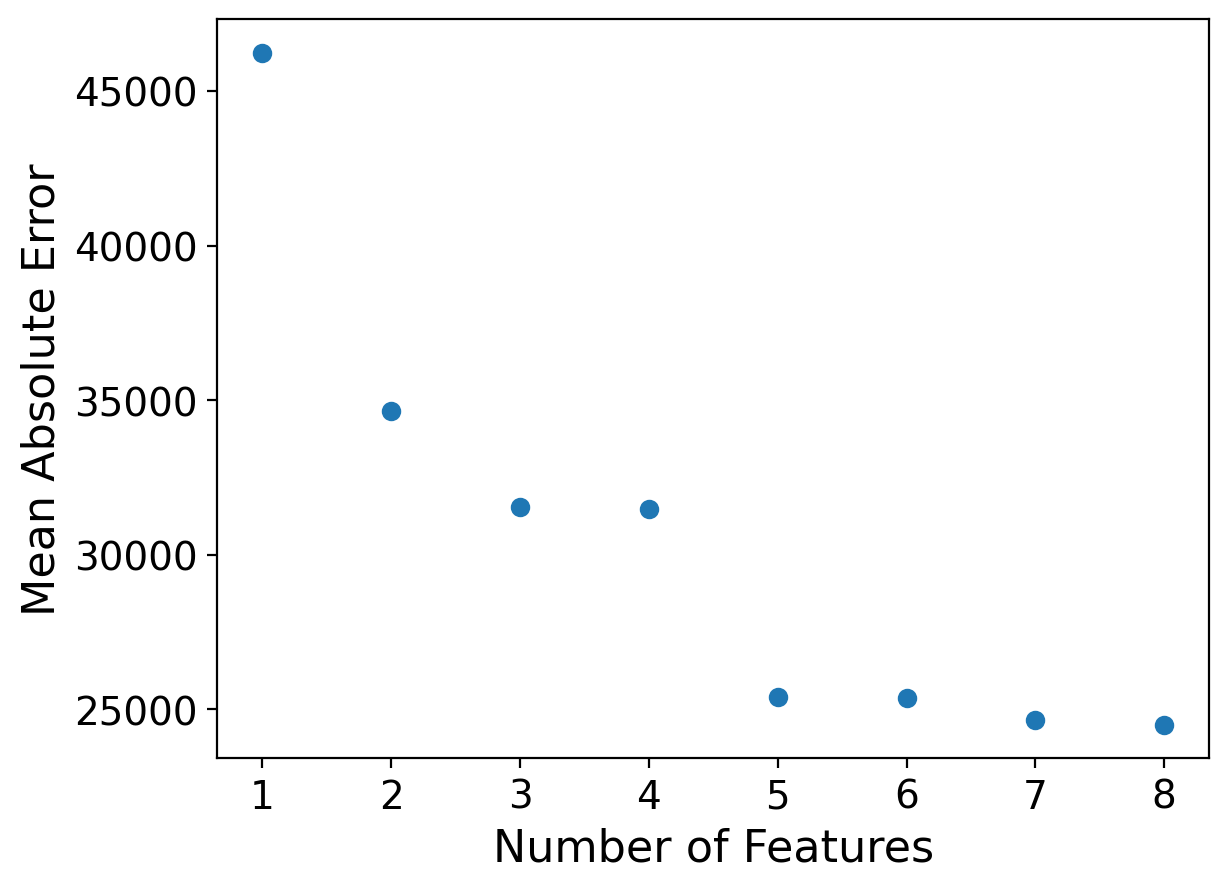

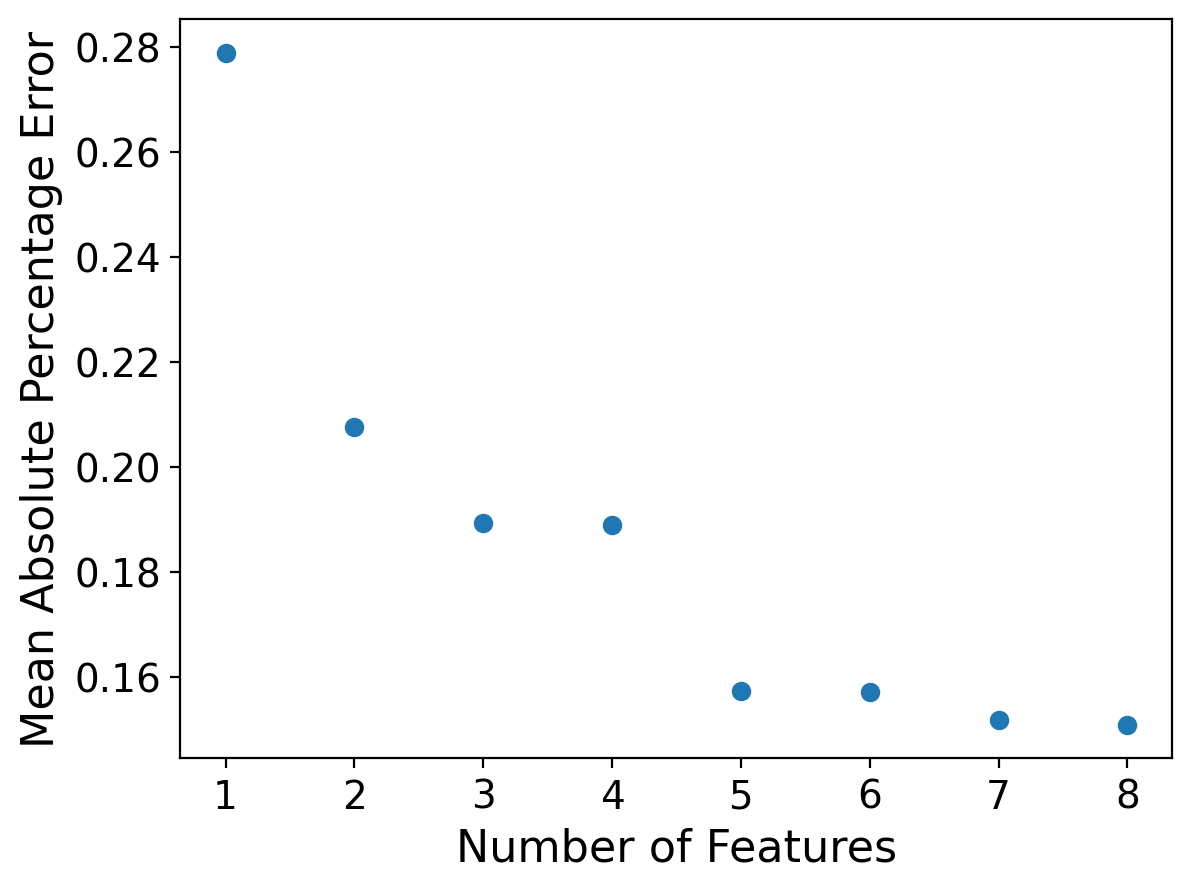

In [33]:
metrics_names = ['R2 score','Mean Squared Error','Mean Absolute Error','Mean Absolute Percentage Error']
metrics = [r2s,MSEs,MAEs,MAPEs]

for i in range(4):
    plot_metrics_features(metrics[i],metrics_names[i])
    plt.show()

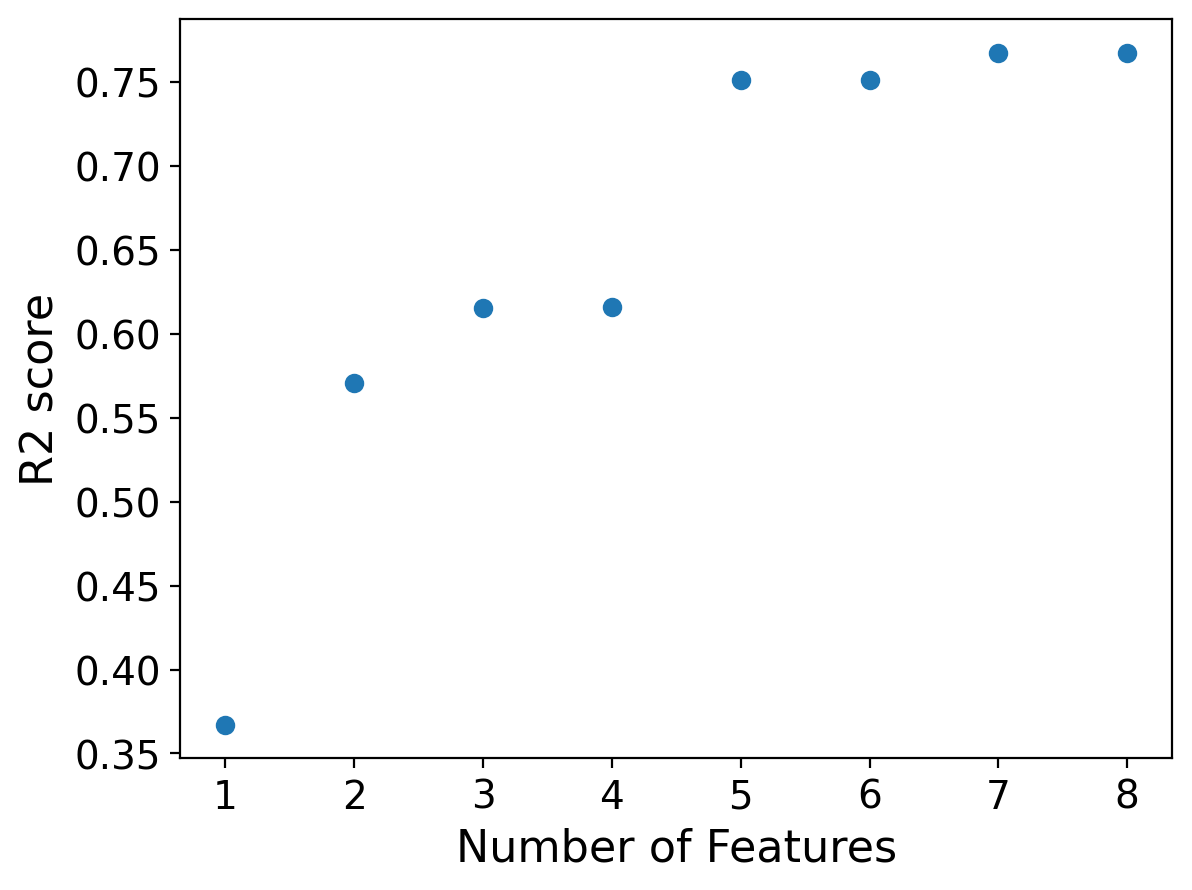

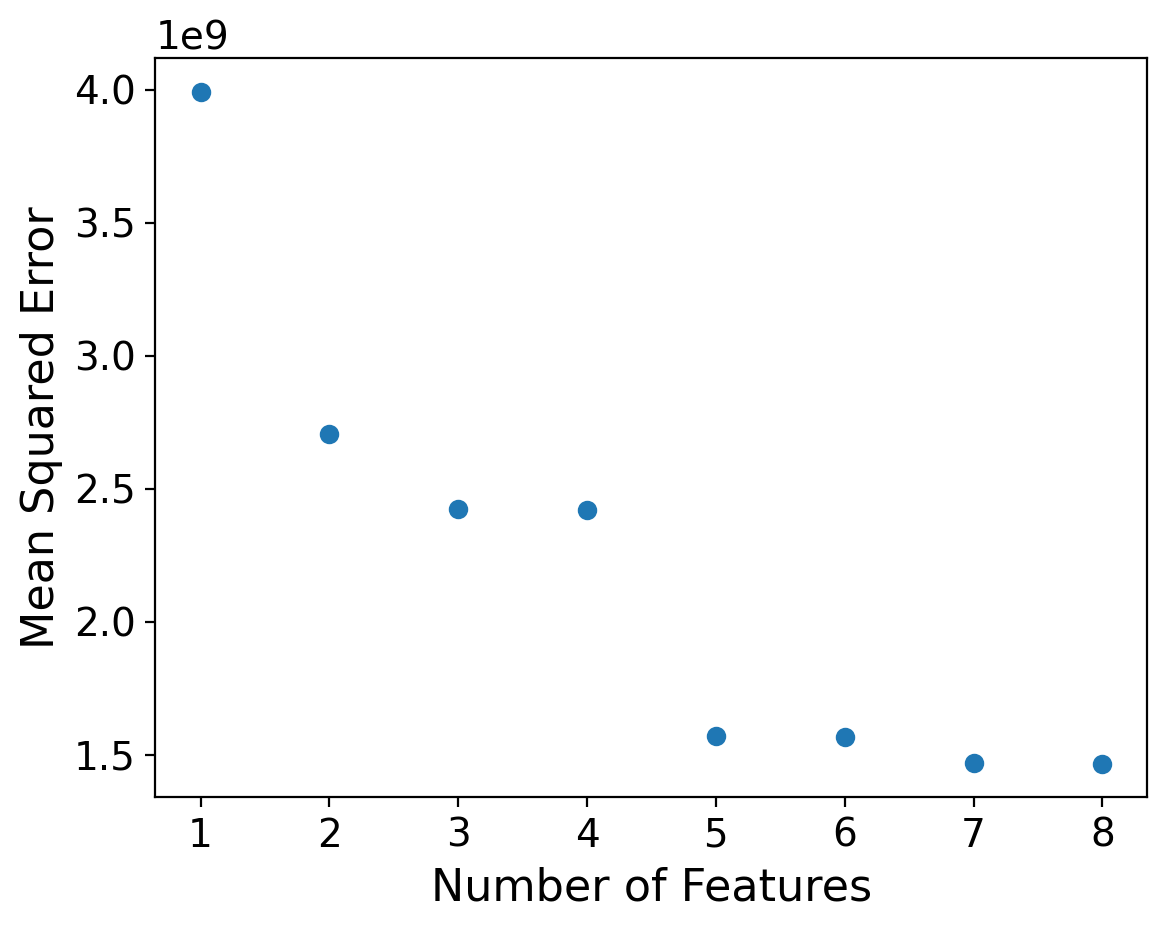

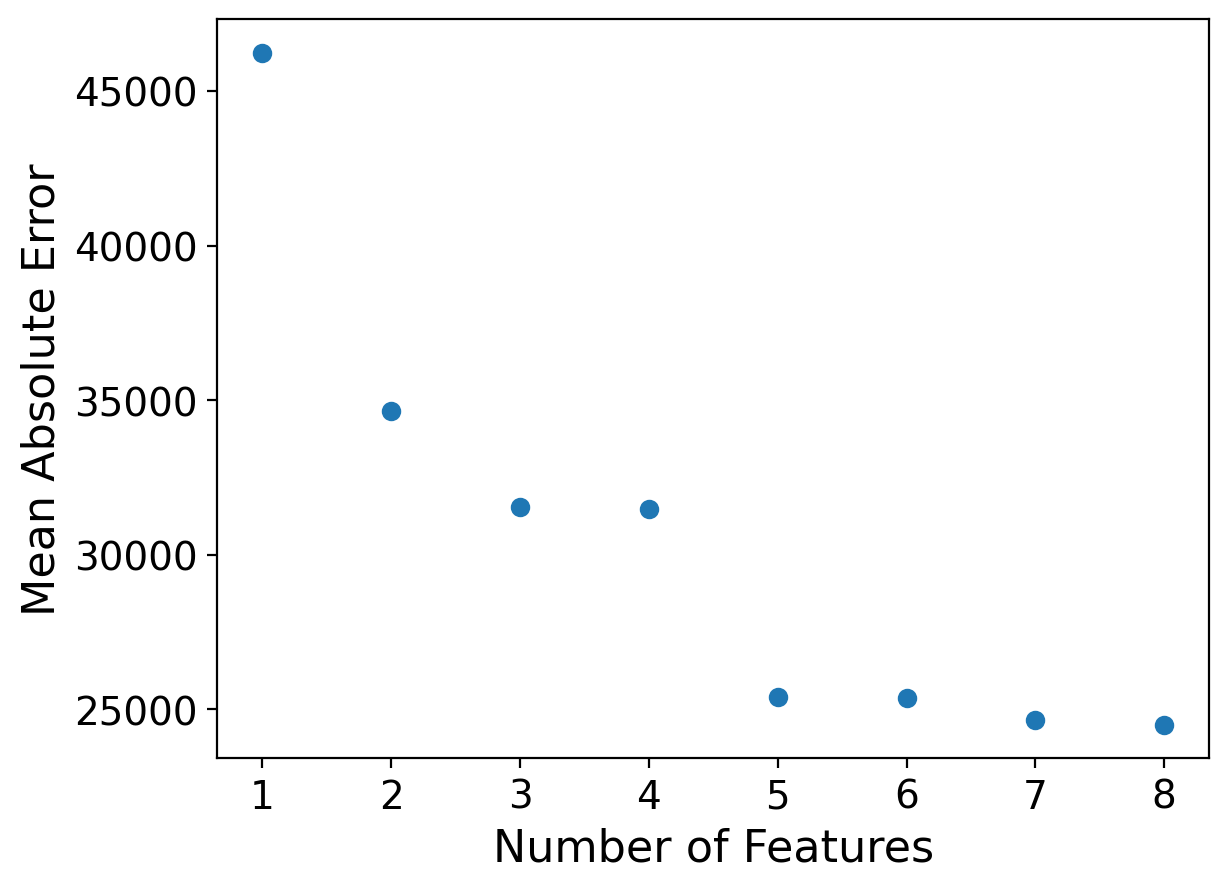

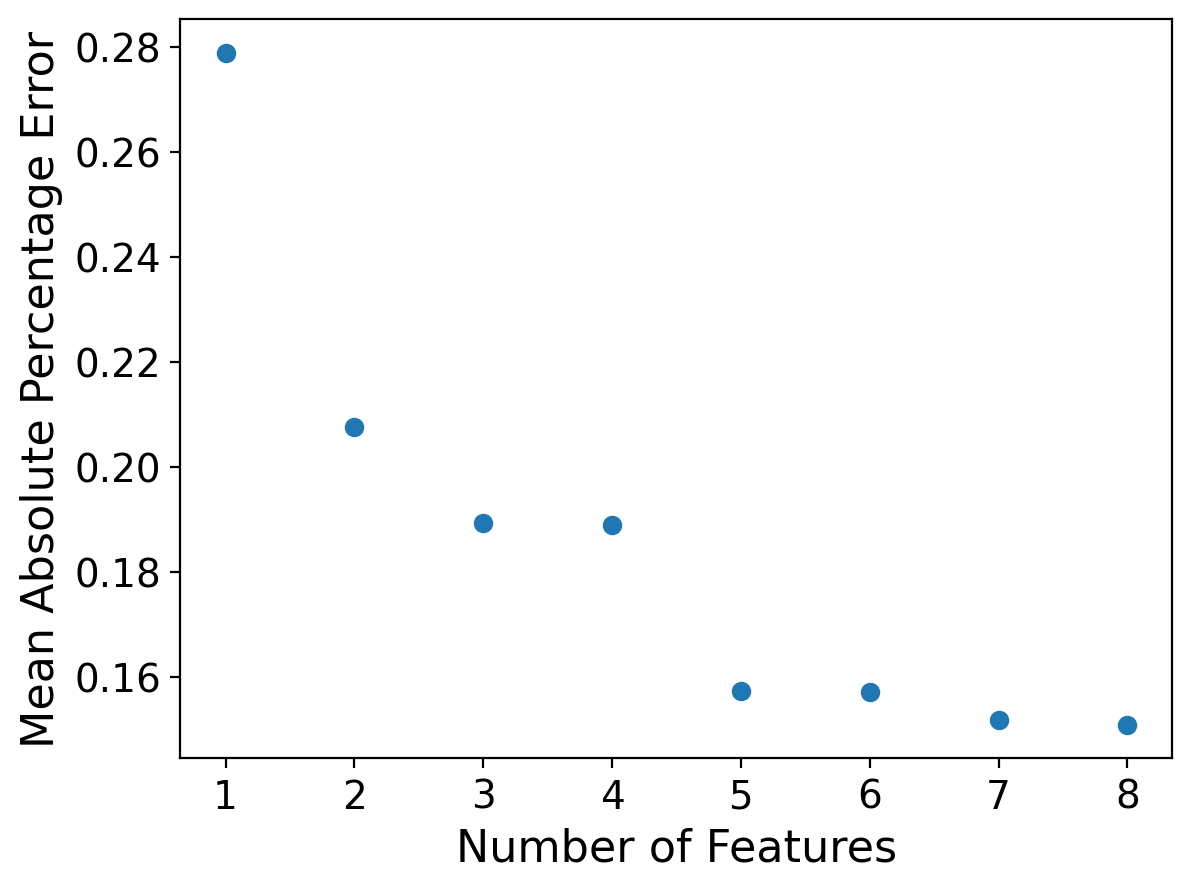

In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import matplotlib.pyplot as plt

# Features to use and corresponding y
train = pd.read_csv('train.csv')
features = train[[
    "1stFlrSF",
    "2ndFlrSF",
    "TotalBsmtSF",
    "LotArea",
    "OverallQual",
    "GrLivArea",
    "GarageCars",
    "GarageArea",
]].values
y = train[['SalePrice']].values

# Train 8 models with increasing number of features
models = []
y_hats = []
for i in range(1,9):
    lnrModel = LinearRegression(fit_intercept=True)
    X = features[:,:i]
    #print(X.shape)
    lnrModel = lnrModel.fit(X,y)
    models.append(lnrModel)
    y_hats.append(lnrModel.predict(X))

# 4 Required metrics
r2s = []
MSEs = []
MAEs = []
MAPEs = []
for y_hat in y_hats:
    r2s.append(r2_score(y,y_hat))
    MSEs.append(mean_squared_error(y,y_hat))
    MAEs.append(mean_absolute_error(y,y_hat))
    MAPEs.append(mean_absolute_percentage_error(y,y_hat))

# Plotting settings
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["axes.titlesize"] = 18

# Plotting function
def plot_metrics_features(metrics,metrics_name):
    plt.scatter(np.arange(1,9), metrics)
    plt.ylabel(metrics_name)
    plt.xlabel("Number of Features")
    return plt

# Draw plots
metrics_names = ['R2 score','Mean Squared Error','Mean Absolute Error','Mean Absolute Percentage Error']
metrics = [r2s,MSEs,MAEs,MAPEs]
for i in range(4):
    plot_metrics_features(metrics[i],metrics_names[i])
    plt.show()